<center><img src="https://matplotlib.org/_static/logo2.png" width=600 alt="Matplotlib Logo"></img></center>

# Matplotlib Basics

---

## Overview
1. Create a basic line plot.
1. Add labels and grid lines to the plot.
1. Plot multiple series of data.
1. Plot image, contour, and filled contour plots.

We will cover the basics of plotting within Python, using the Matplotlib library, including a few different plots available within the library.

## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| NumPy | Necessary | |
| Matlab plots| Helpful | |

* **Experience level**: beginner
* **Time to Learn**: 30 minutes

---

## Imports

Let's import the matplotlib library's `pyplot` interface; this interface is the simplest way to create new Matplotlib figures. To shorten this long name, we import it as `plt` to keep things short but clear.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

<div class="admonition alert alert-info">
    <p class="title" style="font-weight:bold">Info</p>
    Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
</div>

## Generate test data using `NumPy`

Now we generate some data to use while experimenting with plotting:

In [2]:
times = np.array(
    [
        93.0,
        96.0,
        99.0,
        102.0,
        105.0,
        108.0,
        111.0,
        114.0,
        117.0,
        120.0,
        123.0,
        126.0,
        129.0,
        132.0,
        135.0,
        138.0,
        141.0,
        144.0,
        147.0,
        150.0,
        153.0,
        156.0,
        159.0,
        162.0,
    ]
)
temps = np.array(
    [
        310.7,
        308.0,
        296.4,
        289.5,
        288.5,
        287.1,
        301.1,
        308.3,
        311.5,
        305.1,
        295.6,
        292.4,
        290.4,
        289.1,
        299.4,
        307.9,
        316.6,
        293.9,
        291.2,
        289.8,
        287.1,
        285.8,
        303.3,
        310.0,
    ]
)

## Figure and Axes

Now let's make our first plot with Matplotlib. Matplotlib has two core objects: the `Figure` and the `Axes`. The `Axes` is an individual plot with an x-axis, a y-axis, labels, etc; it has all of the various plotting methods we use. A `Figure` holds one or more `Axes` on which we draw; think of the `Figure` as the level at which things are saved to files (e.g. PNG, SVG)

![anatomy of a figure](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png "anatomy of a figure")

## Line plots

Let's create a `Figure` whose dimensions, if printed out on hardcopy, would be 10 inches wide and 6 inches long (assuming a landscape orientation). We then create an `Axes`, consisting of a single subplot, on the `Figure`. After that, we call `plot`, with `times` as the data along the x-axis (independent values) and `temps` as the data along the y-axis (the dependent values).

<div class="admonition alert alert-info">
    <p class="title" style="font-weight:bold">Info</p>
    By default, <code>ax.plot</code> will create a line plot, as seen below 
</div>



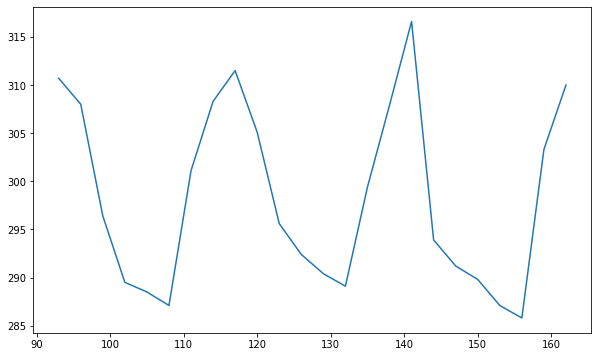

In [3]:
# Create a figure
fig = plt.figure(figsize=(10, 6))

# Ask, out of a 1x1 grid of plots, the first axes.
ax = fig.add_subplot(1, 1, 1)

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps)

### Adding axes labels

Next, add x- and y-axis labels to our `Axes` object.

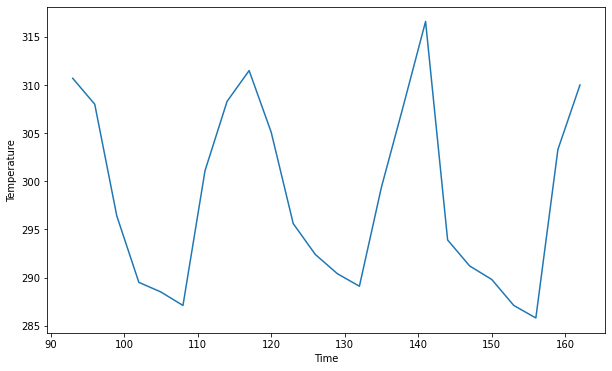

In [4]:
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Prompt the notebook to re-display the figure after we modify it
fig

We can also add a title to the plot and increase the fontsize:

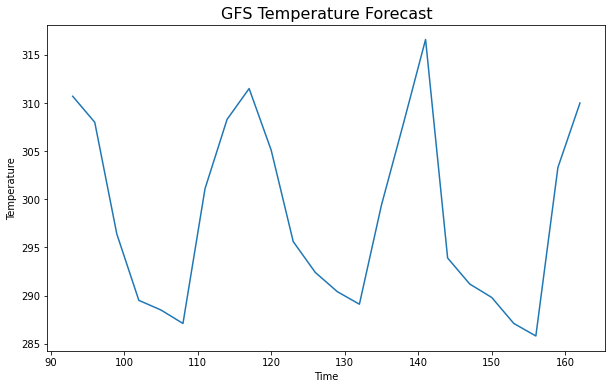

In [5]:
ax.set_title('GFS Temperature Forecast', size=16)

fig

Of course, we can do so much more...

We start by setting up another temperature array

In [6]:
temps_1000 = np.array(
    [
        316.0,
        316.3,
        308.9,
        304.0,
        302.0,
        300.8,
        306.2,
        309.8,
        313.5,
        313.3,
        308.3,
        304.9,
        301.0,
        299.2,
        302.6,
        309.0,
        311.8,
        304.7,
        304.6,
        301.8,
        300.6,
        299.9,
        306.3,
        311.3,
    ]
)

### Adding labels and a grid

Here we call `plot` more than once to plot multiple series of temperature on the same plot; when plotting we pass `label` to `plot` to facilitate automatic creation of legend labels. This is added with the `legend` call. We also add gridlines to the plot using the `grid()` call.

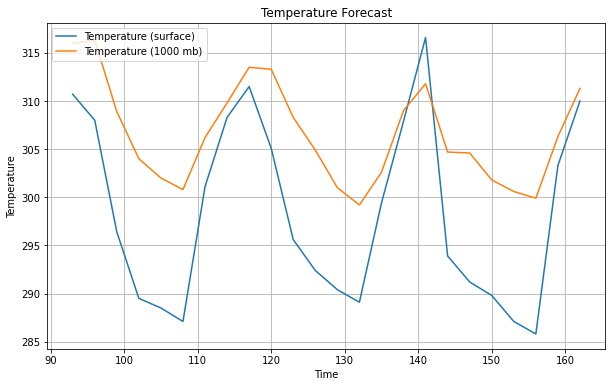

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Plot two series of data
# The label argument is used when generating a legend.
ax.plot(times, temps, label='Temperature (surface)')
ax.plot(times, temps_1000, label='Temperature (1000 mb)')

# Add labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')

# Add gridlines
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

### Customizing colors

We're not restricted to the default look of the plots, but rather we can override style attributes, such as `linestyle` and `color`. `color` can accept a wide array of options for color, such as `red` or `blue` or HTML color codes. Here we use some different shades of red taken from the Tableau color set in matplotlib, by using `tab:red` for color.

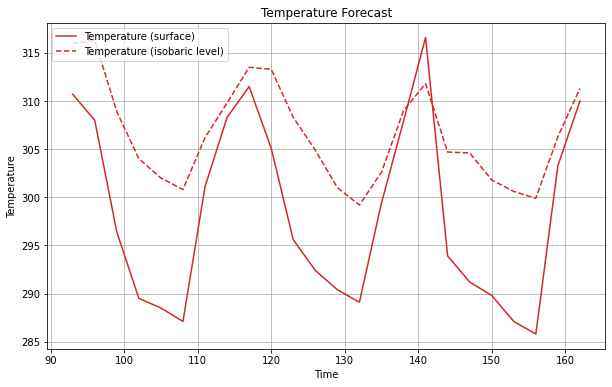

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(
    times,
    temps_1000,
    color='tab:red',
    linestyle='--',
    label='Temperature (isobaric level)',
)

# Set the labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')

# Add the grid
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

## Working with multiple panels in a figure

Start first with some more fake data - in this case, we add dewpoint data!

In [9]:
dewpoint = 0.9 * temps
dewpoint_1000 = 0.9 * temps_1000

Now, let's plot it up, with the other temperature data!

#### Using add_subplot to create two different subplots within the figure
We can use the `.add_subplot()` method to add subplots to our figure! The subplot arguements are formatted as follows:
`(rows, columns, subplot_number)`

For example, if we want a single row, with two columns, we use the following code block

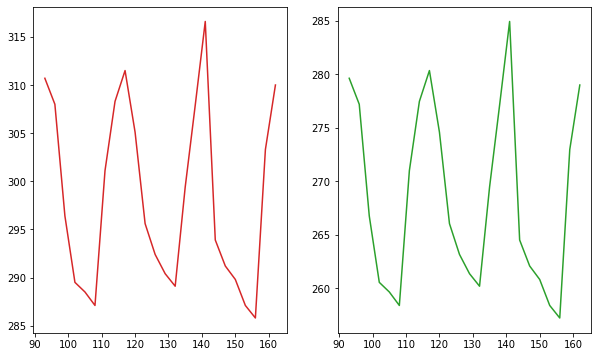

In [10]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, dewpoint, color='tab:green')

### Adding titles to each subplot
We can add titles to these plots too - notice how these subplots are titled separately, each using `ax.set_title` after each subplot

Text(0.5, 1.0, 'Dewpoint')

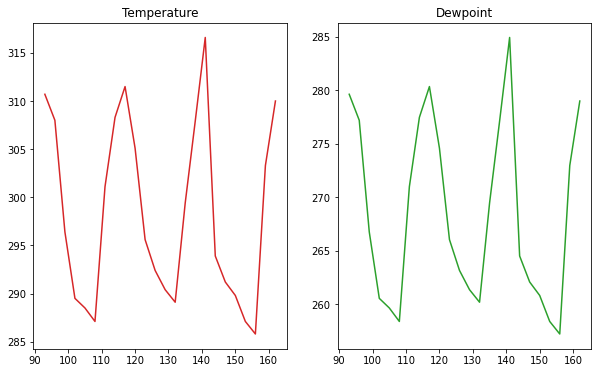

In [11]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, dewpoint, color='tab:green')
ax2.set_title('Dewpoint')

### Using `ax.set_xlim` and `ax.set_ylim` to control the plot boundaries

You may want to limit the extent of each plot, which you can do by using `.set_xlim` and `set_ylim` on the axes you are editing

(110.0, 130.0)

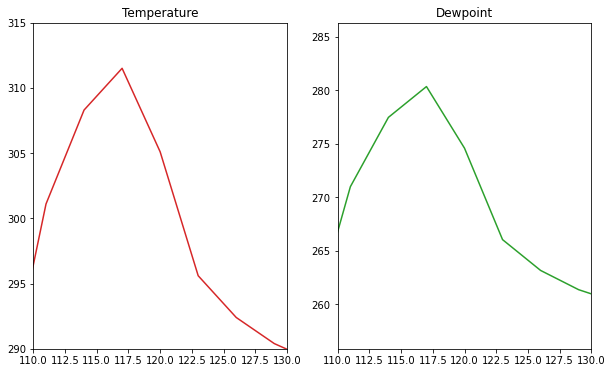

In [12]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')
ax.set_xlim(110, 130)
ax.set_ylim(290, 315)

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(times, dewpoint, color='tab:green')
ax2.set_title('Dewpoint')
ax2.set_xlim(110, 130)

### Using `sharex` and `sharey` to share plot limits

You may want to have both subplots share the same x/y axis limits - you can do this by adding `sharex=ax` and `sharey=ax` as arguments when adding a new axis (ex. `ax2 = fig.add_subplot()`) where `ax` is the axis you want your new axis to share limits with

Let's take a look at an example

Text(0.5, 1.0, 'Dewpoint')

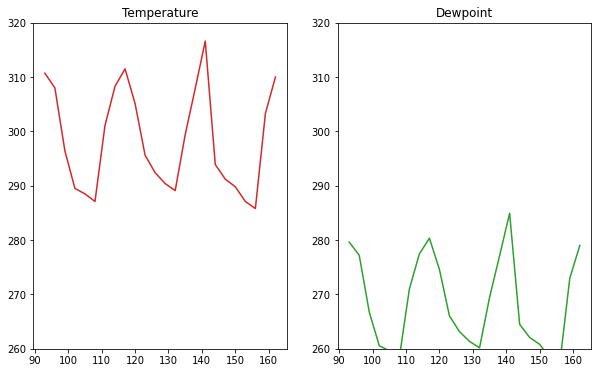

In [13]:
fig = plt.figure(figsize=(10, 6))

# Create a plot for temperature
ax = fig.add_subplot(1, 2, 1)
ax.plot(times, temps, color='tab:red')
ax.set_title('Temperature')
ax.set_ylim(260, 320)

# Create a plot for dewpoint
ax2 = fig.add_subplot(1, 2, 2, sharex=ax, sharey=ax)
ax2.plot(times, dewpoint, color='tab:green')
ax2.set_title('Dewpoint')

### Putting this all together

<div class="admonition alert alert-info">
    <p class="title" style="font-weight:bold">Info</p>
    You may wish to move around the location of your legend - you can do this by changing the <code> loc </code> arguement in <code> ax.legend() </code>
</div>

(95.0, 162.0)

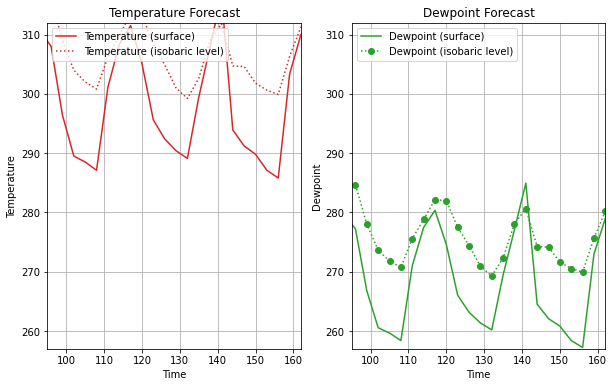

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 2, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='Temperature (surface)')
ax.plot(
    times,
    temps_1000,
    color='tab:red',
    linestyle=':',
    label='Temperature (isobaric level)',
)

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Forecast')
ax.grid(True)
ax.legend(loc='upper left')


# Add our second plot - for dewpoint, changing the colors and labels
ax2 = fig.add_subplot(1, 2, 2, sharex=ax, sharey=ax)
ax2.plot(times, dewpoint, color='tab:green', label='Dewpoint (surface)')
ax2.plot(
    times,
    dewpoint_1000,
    color='tab:green',
    linestyle=':',
    marker='o',
    label='Dewpoint (isobaric level)',
)

ax2.set_xlabel('Time')
ax2.set_ylabel('Dewpoint')
ax2.set_title('Dewpoint Forecast')
ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_ylim(257, 312)
ax2.set_xlim(95, 162)

## Scatterplot
Maybe it doesn't make sense to plot your data as a line plot, but with markers (aka scatter plot). We can do this by setting the `linestyle` to `None` and specifying a marker type, size, color, etc.

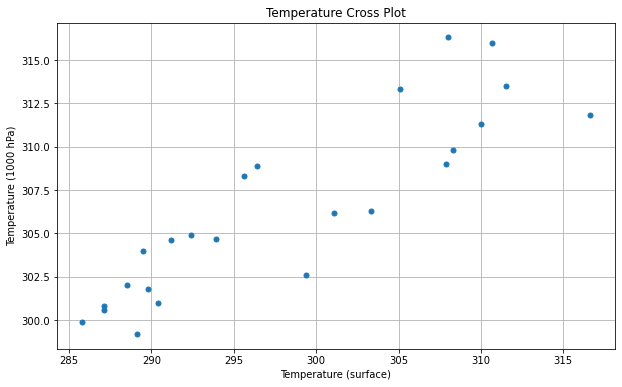

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify no line with circle markers
ax.plot(temps, temps_1000, linestyle='None', marker='o', markersize=5)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

<div class="admonition alert alert-info">
    <p class="title" style="font-weight:bold">Info</p>
    You can also use the <code> scatter </code> method, which is slower, but will give you more control, such as being able to color the points individually based upon a third variable.
</div>


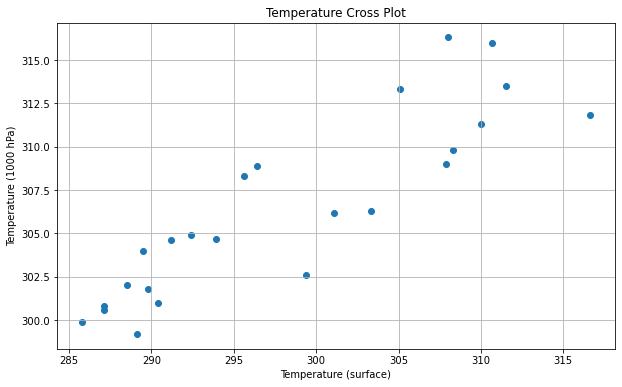

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify no line with circle markers
ax.scatter(temps, temps_1000)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

Let's put together the following:
 * Beginning with our code above, add the `c` keyword argument to the `scatter` call and color the points by the difference between the surface and 1000 hPa temperature.
 * Add a 1:1 line to the plot (slope of 1, intercept of zero). Use a black dashed line.
 * Change the color map to be something more appropriate for this plot.
 * Try to add a colorbar to the plot (have a look at the matplotlib documentation for help).

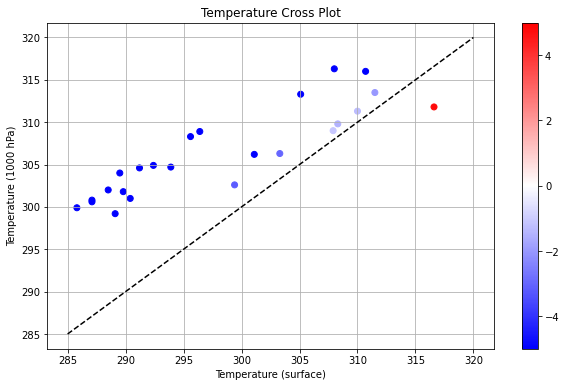

In [17]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot([285, 320], [285, 320], color='black', linestyle='--')
s = ax.scatter(temps, temps_1000, c=(temps - temps_1000), cmap='bwr', vmin=-5, vmax=5)
fig.colorbar(s)

ax.set_xlabel('Temperature (surface)')
ax.set_ylabel('Temperature (1000 hPa)')
ax.set_title('Temperature Cross Plot')
ax.grid(True)

## imshow
`imshow` displays the values in an array as colored pixels, similar to a heat map.

Here is some fake data to work with - let's use a bivariate normal distribution.

In [18]:
x = y = np.arange(-3.0, 3.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-(X ** 2) - Y ** 2)
Z2 = np.exp(-((X - 1) ** 2) - (Y - 1) ** 2)
Z = (Z1 - Z2) * 2

Let's start with a simple imshow plot.

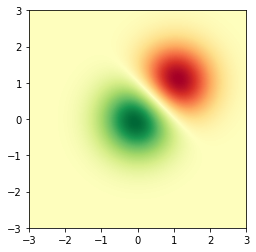

In [19]:
fig, ax = plt.subplots()
im = ax.imshow(
    Z, interpolation='bilinear', cmap='RdYlGn', origin='lower', extent=[-3, 3, -3, 3]
)

## contour/contourf
- `contour` creates contours around data.
- `contourf` creates filled contours around data.

We can also create contours around the data.

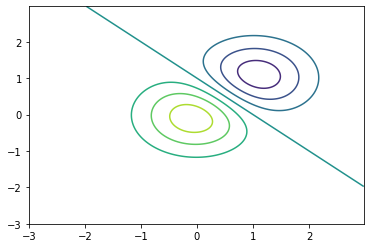

In [20]:
fig, ax = plt.subplots()
ax.contour(X, Y, Z)

Now let's label our contour lines

<a list of 13 text.Text objects>

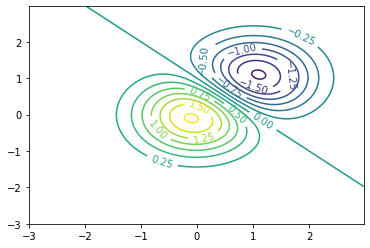

In [21]:
fig, ax = plt.subplots()
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.25))
ax.clabel(c)

The `contourf` method stands for contour fill, which fills in the contours!

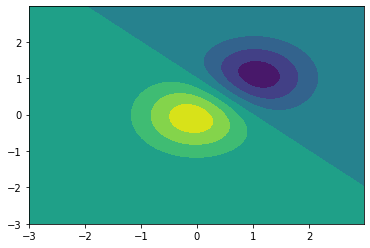

In [22]:
fig, ax = plt.subplots()
c = ax.contourf(X, Y, Z)

Finally, let's reate a figure using `imshow` and `contour` that is a heatmap in the colormap of our choice, then overlay black contours with a 0.5 contour interval.

<a list of 7 text.Text objects>

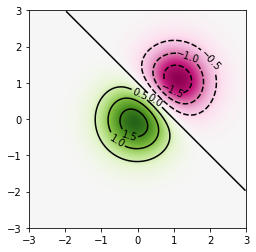

In [23]:
fig, ax = plt.subplots()
im = ax.imshow(
    Z, interpolation='bilinear', cmap='PiYG', origin='lower', extent=[-3, 3, -3, 3]
)
c = ax.contour(X, Y, Z, levels=np.arange(-2, 2, 0.5), colors='black')
ax.clabel(c)

---

## Summary
* `Matplotlib` can be used to visualize datasets you are working with
* You can customize various features such as labels and styles
* There are a wide variety of plotting options available, including (but not limited to)
    * Line plots (`plot`)
    * Scatter plots (`scatter`)
    * Imshow (`imshow`)
    * Contour line and contour fill plots (`contour`, `contourf`)

## What's Next?
In the next notebook, we will cover more plotting functionality such as histograms, pie charts, and animation

## Resources and References

The goal of this tutorial is to provide an overview of the use of the Matplotlib library. It covers creating simple line plots, but it is by no means comprehensive. For more information, try looking at the:
- [Matplotlib Documentation](http://matplotlib.org)
- [Matplotlib `plot` documentation](https://matplotlib.org/stable/index.html)
- [GeoCAT examples gallery](https://geocat-examples.readthedocs.io/en/latest/gallery/index.html)